In [9]:
import sys
import logging

from matplotlib import rcParams

import seaborn as sns
import torch
import numpy as np
import pandas as pd

sys.path.append('..', '..')

from src.dataset import MelodyDataset

rcParams['figure.figsize'] = 20,10

In [10]:
logger = logging.getLogger()

d = MelodyDataset(
    encoding_type='duration',
    polyphonic=False,
    chord_encoding_type='extended',
    chord_extension_count=7,
    duration_correction=0,
    transpose_mode='all',
    logger=logger
)

d.load()

In [11]:
d.tensor_dataset

In [12]:
l = []
pitch_classes = ['C','Db','D','Eb','E','F','F#','G', 'Ab', 'A', 'Bb', 'B']


for i, t in enumerate(d.tensor_dataset):
    for r in t:
        l.append({
            'song_idx': i,
            'original': r[0].item(),
            'ticks': r[1].item(),
            'offset': r[2].item(),
            'pitch': r[3].item(),
            'pitch_class': pitch_classes[r[3].item() % 12]  if r[3] != 128 else np.nan,
            'duration': r[4].item(),
            'chord': r[5:12].tolist()
        })

df = pd.DataFrame.from_dict(l)

In [13]:
df

,song_idx,original,ticks,offset,pitch,pitch_class,duration,chord
0,0,0,0,0,128,NaN,40,"[44, 56, 59, 63, 66, 71, 75]"
1,0,0,40,40,51,Eb,3,"[44, 56, 59, 63, 66, 71, 75]"
2,0,0,43,43,55,G,3,"[44, 56, 59, 63, 66, 71, 75]"
3,0,0,46,46,59,B,3,"[44, 56, 59, 63, 66, 71, 75]"
4,0,0,49,1,58,Bb,3,"[49, 61, 64, 68, 71, 76, 80]"
...,...,...,...,...,...,...,...,...
1524643,3599,1,2205,45,77,F,68,"[60, 72, 76, 79, 82, 88, 91]"
1524644,3599,1,2273,17,128,NaN,7,"[53, 65, 69, 72, 74, 81, 84]"
1524645,3599,1,2280,24,72,C,6,"[53, 65, 69, 72, 74, 81, 84]"
1524646,3599,1,2286,30,128,NaN,6,"[53, 65, 69, 72, 74, 81, 84]"


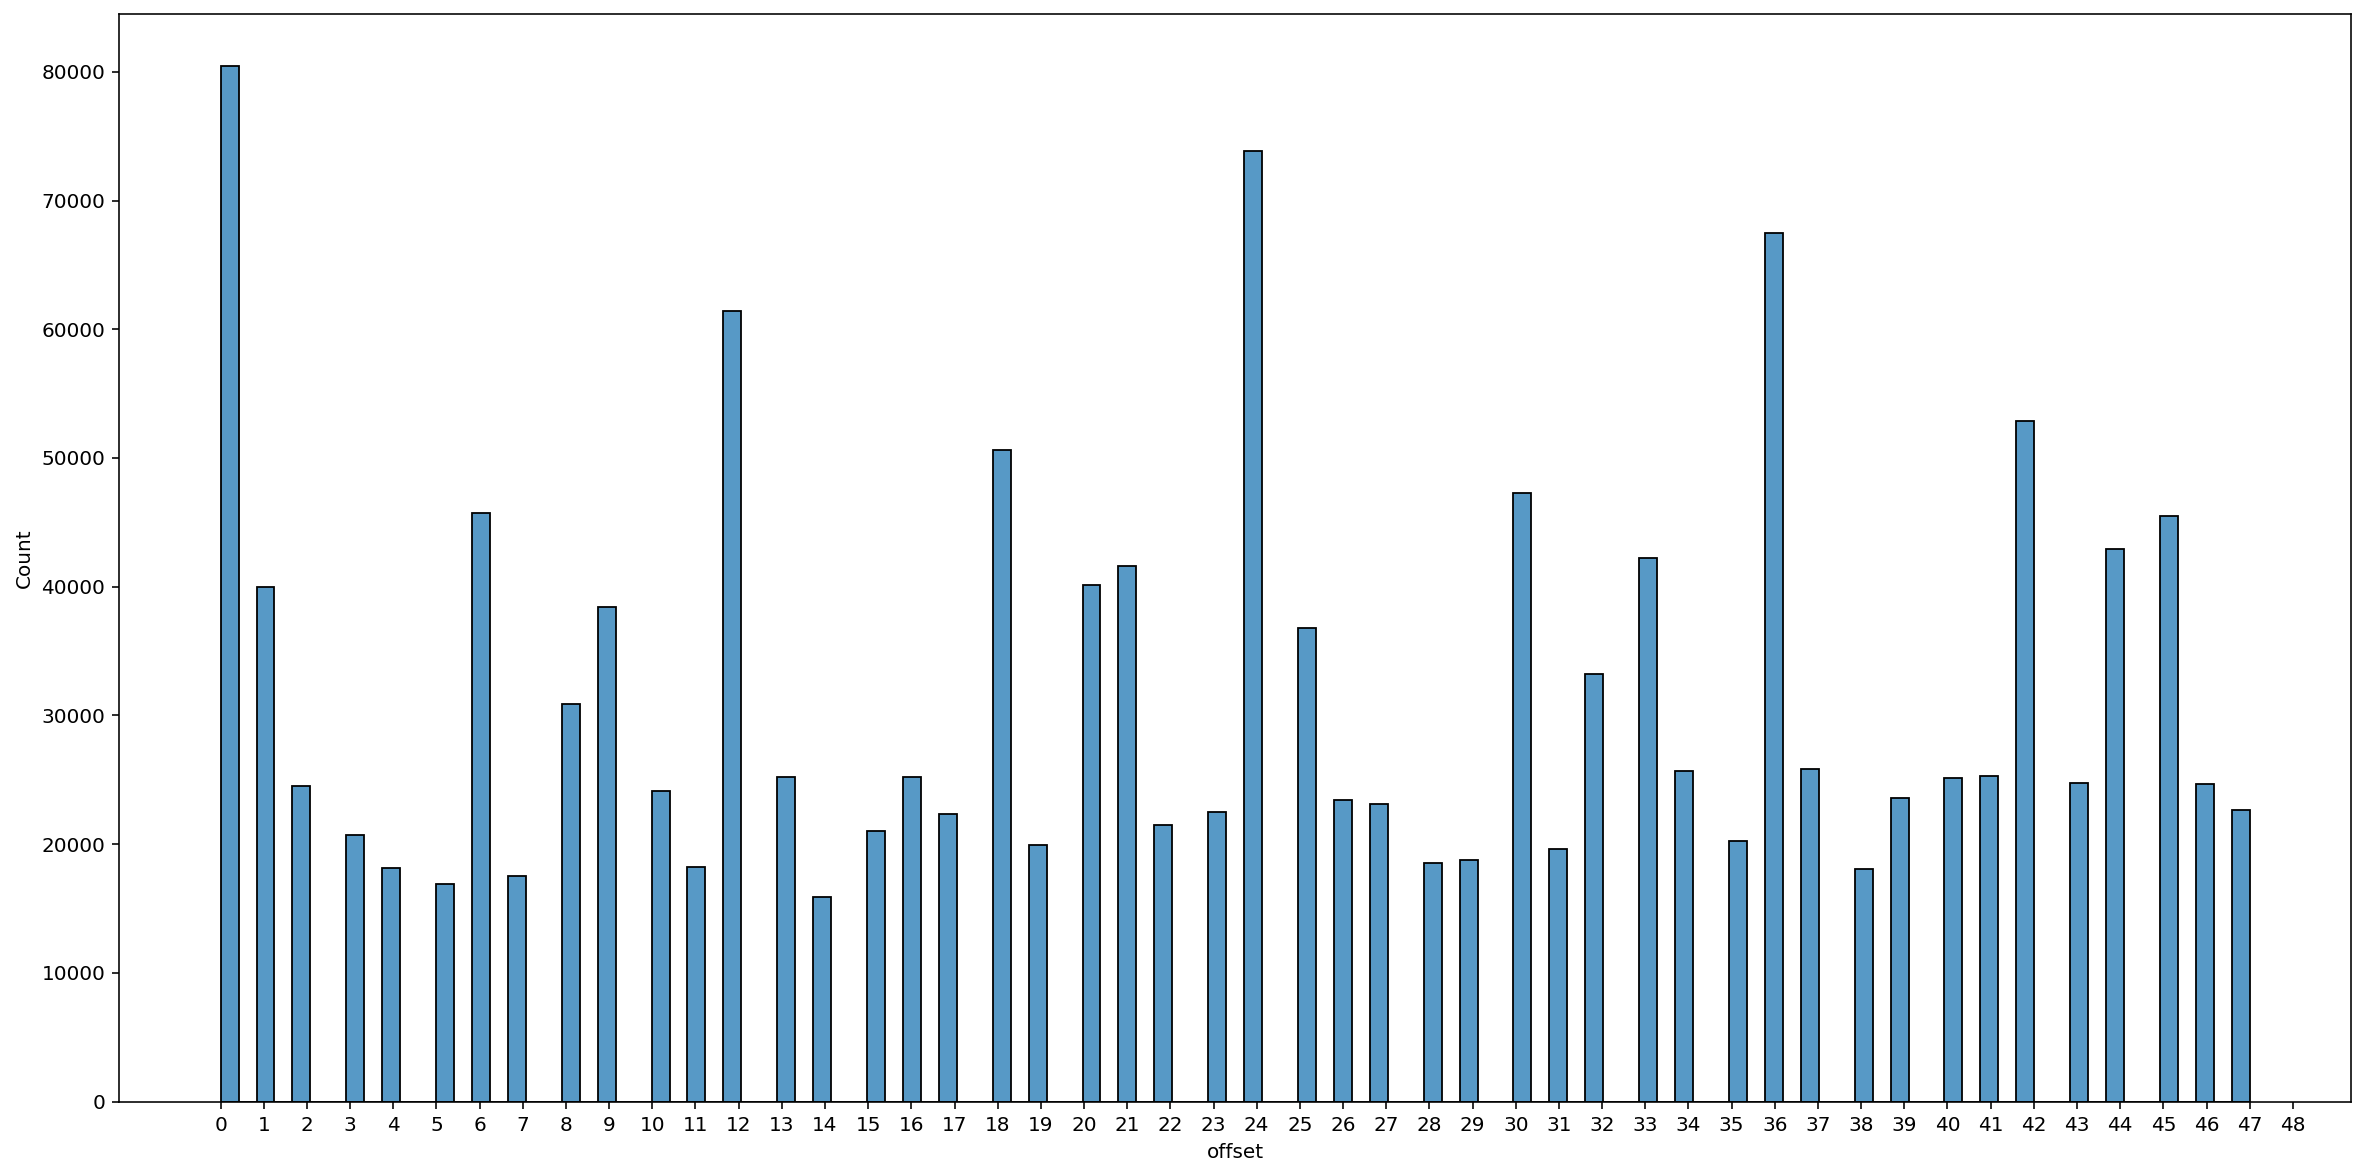

In [15]:
g = sns.histplot(
    data=df, 
    x='offset',
#     stat="density", common_norm=False
)
g.set_xticks(range(0,49))

In [14]:
df.offset.value_counts().sort_values(ascending=False)

0     80436
24    73872
36    67500
12    61440
42    52860
18    50652
30    47268
6     45720
45    45480
44    42912
33    42192
21    41592
20    40152
1     40008
9     38460
25    36780
32    33252
8     30888
37    25824
34    25644
41    25308
16    25200
13    25188
40    25116
43    24780
46    24684
2     24504
10    24096
39    23604
26    23436
27    23148
47    22656
23    22524
17    22320
22    21504
15    21012
3     20700
35    20268
19    19908
31    19644
29    18792
28    18564
11    18192
4     18156
38    18048
7     17556
5     16896
14    15912
Name: offset, dtype: int64

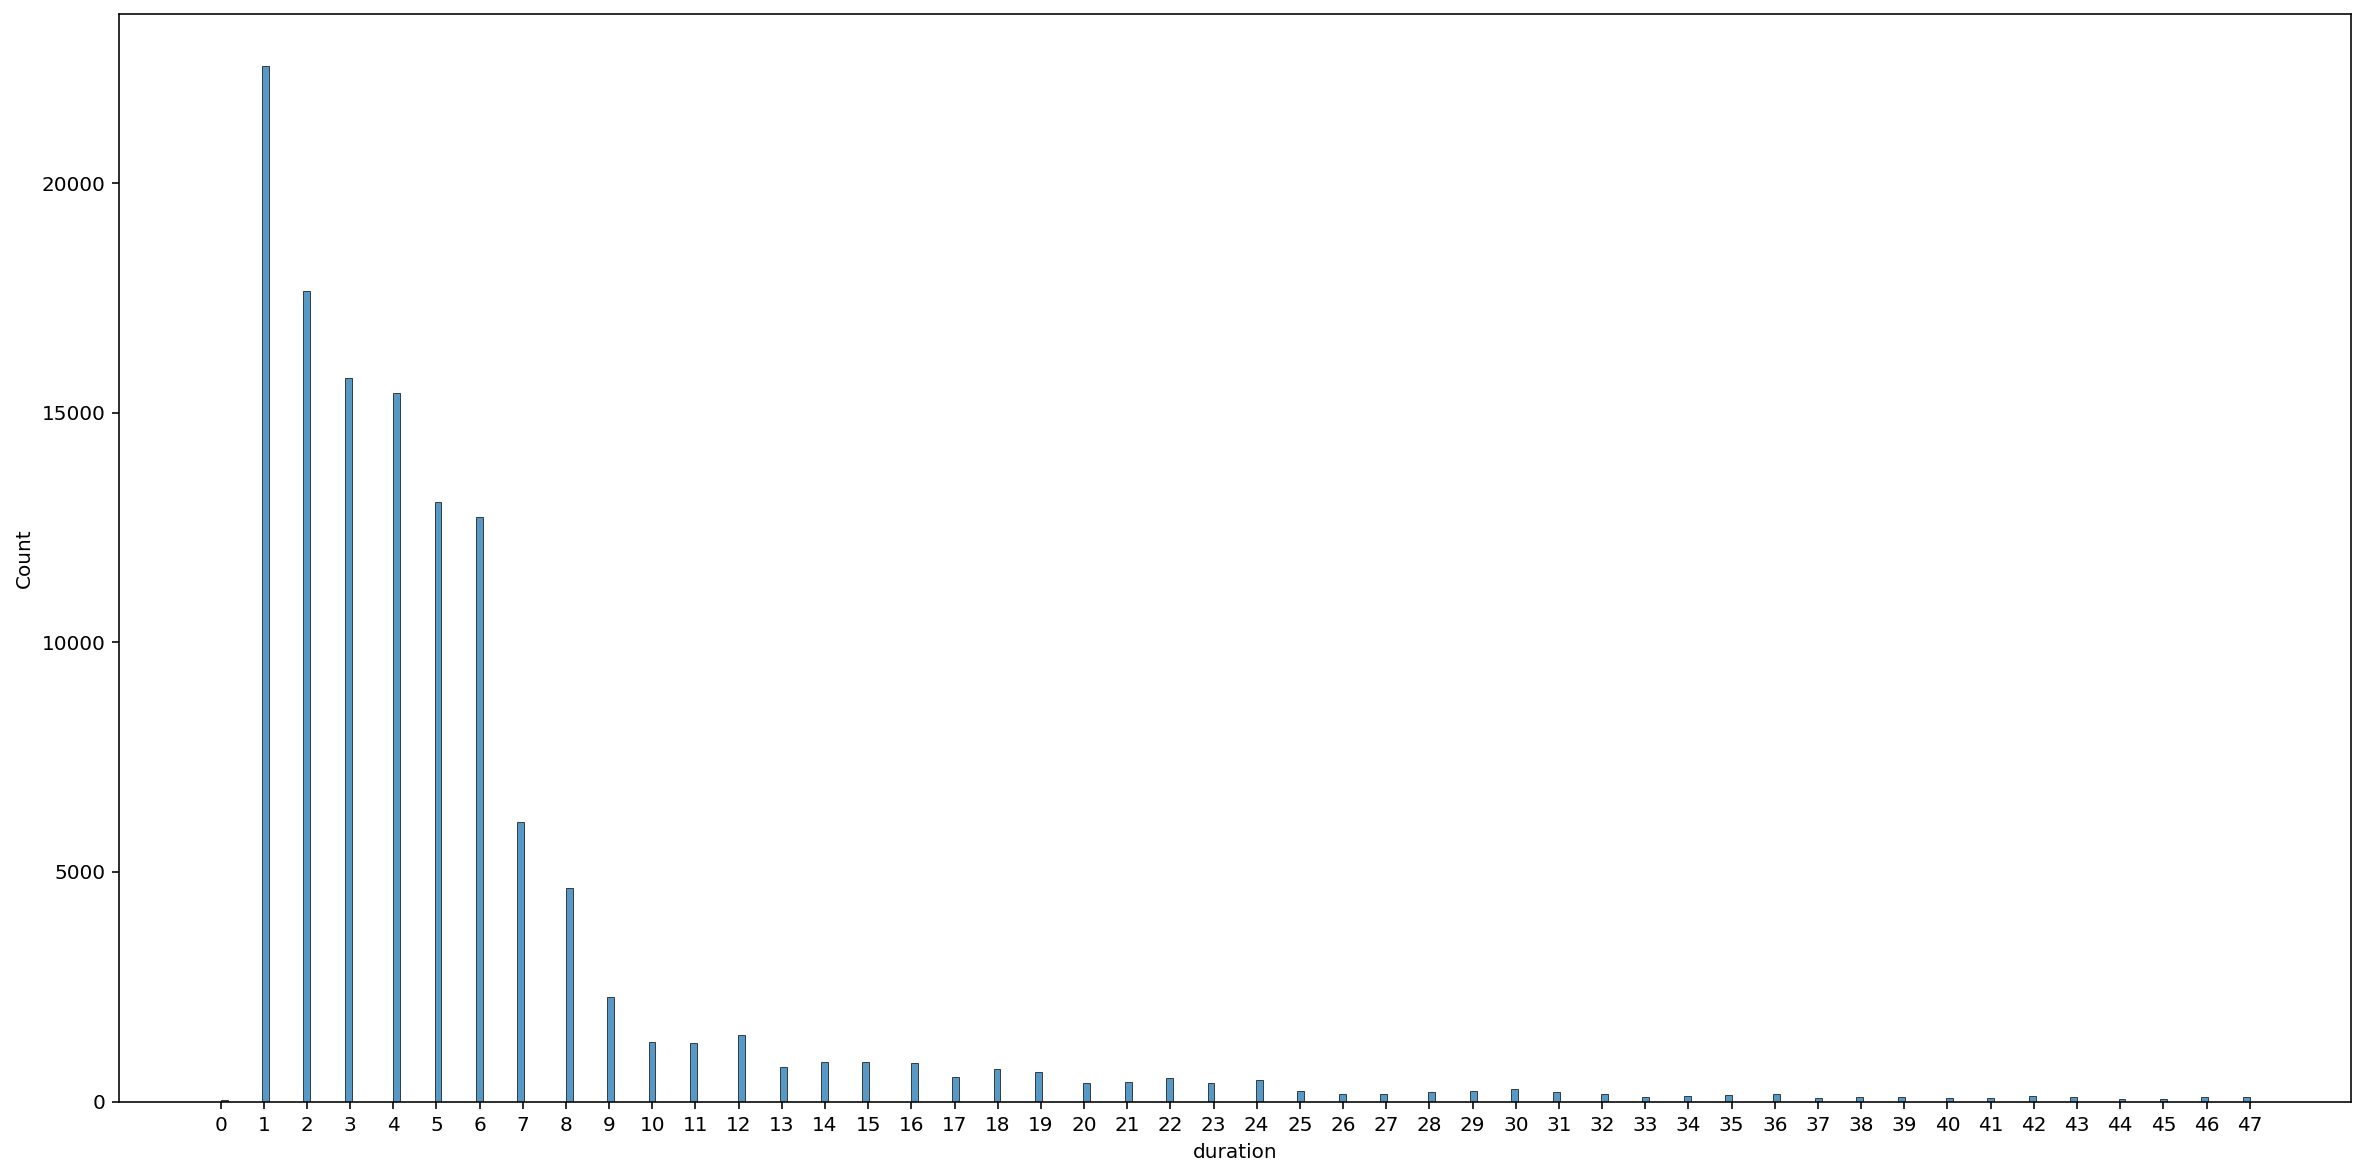

In [8]:
# bins = 100

g = sns.histplot(
    data=df[df['duration'] < 48], 
#     bins=bins,
    x='duration'
)
g.set_xticks(range(0,48))

In [16]:
df[df['duration'] == 0]

,song_idx,original,ticks,offset,pitch,pitch_class,duration,chord


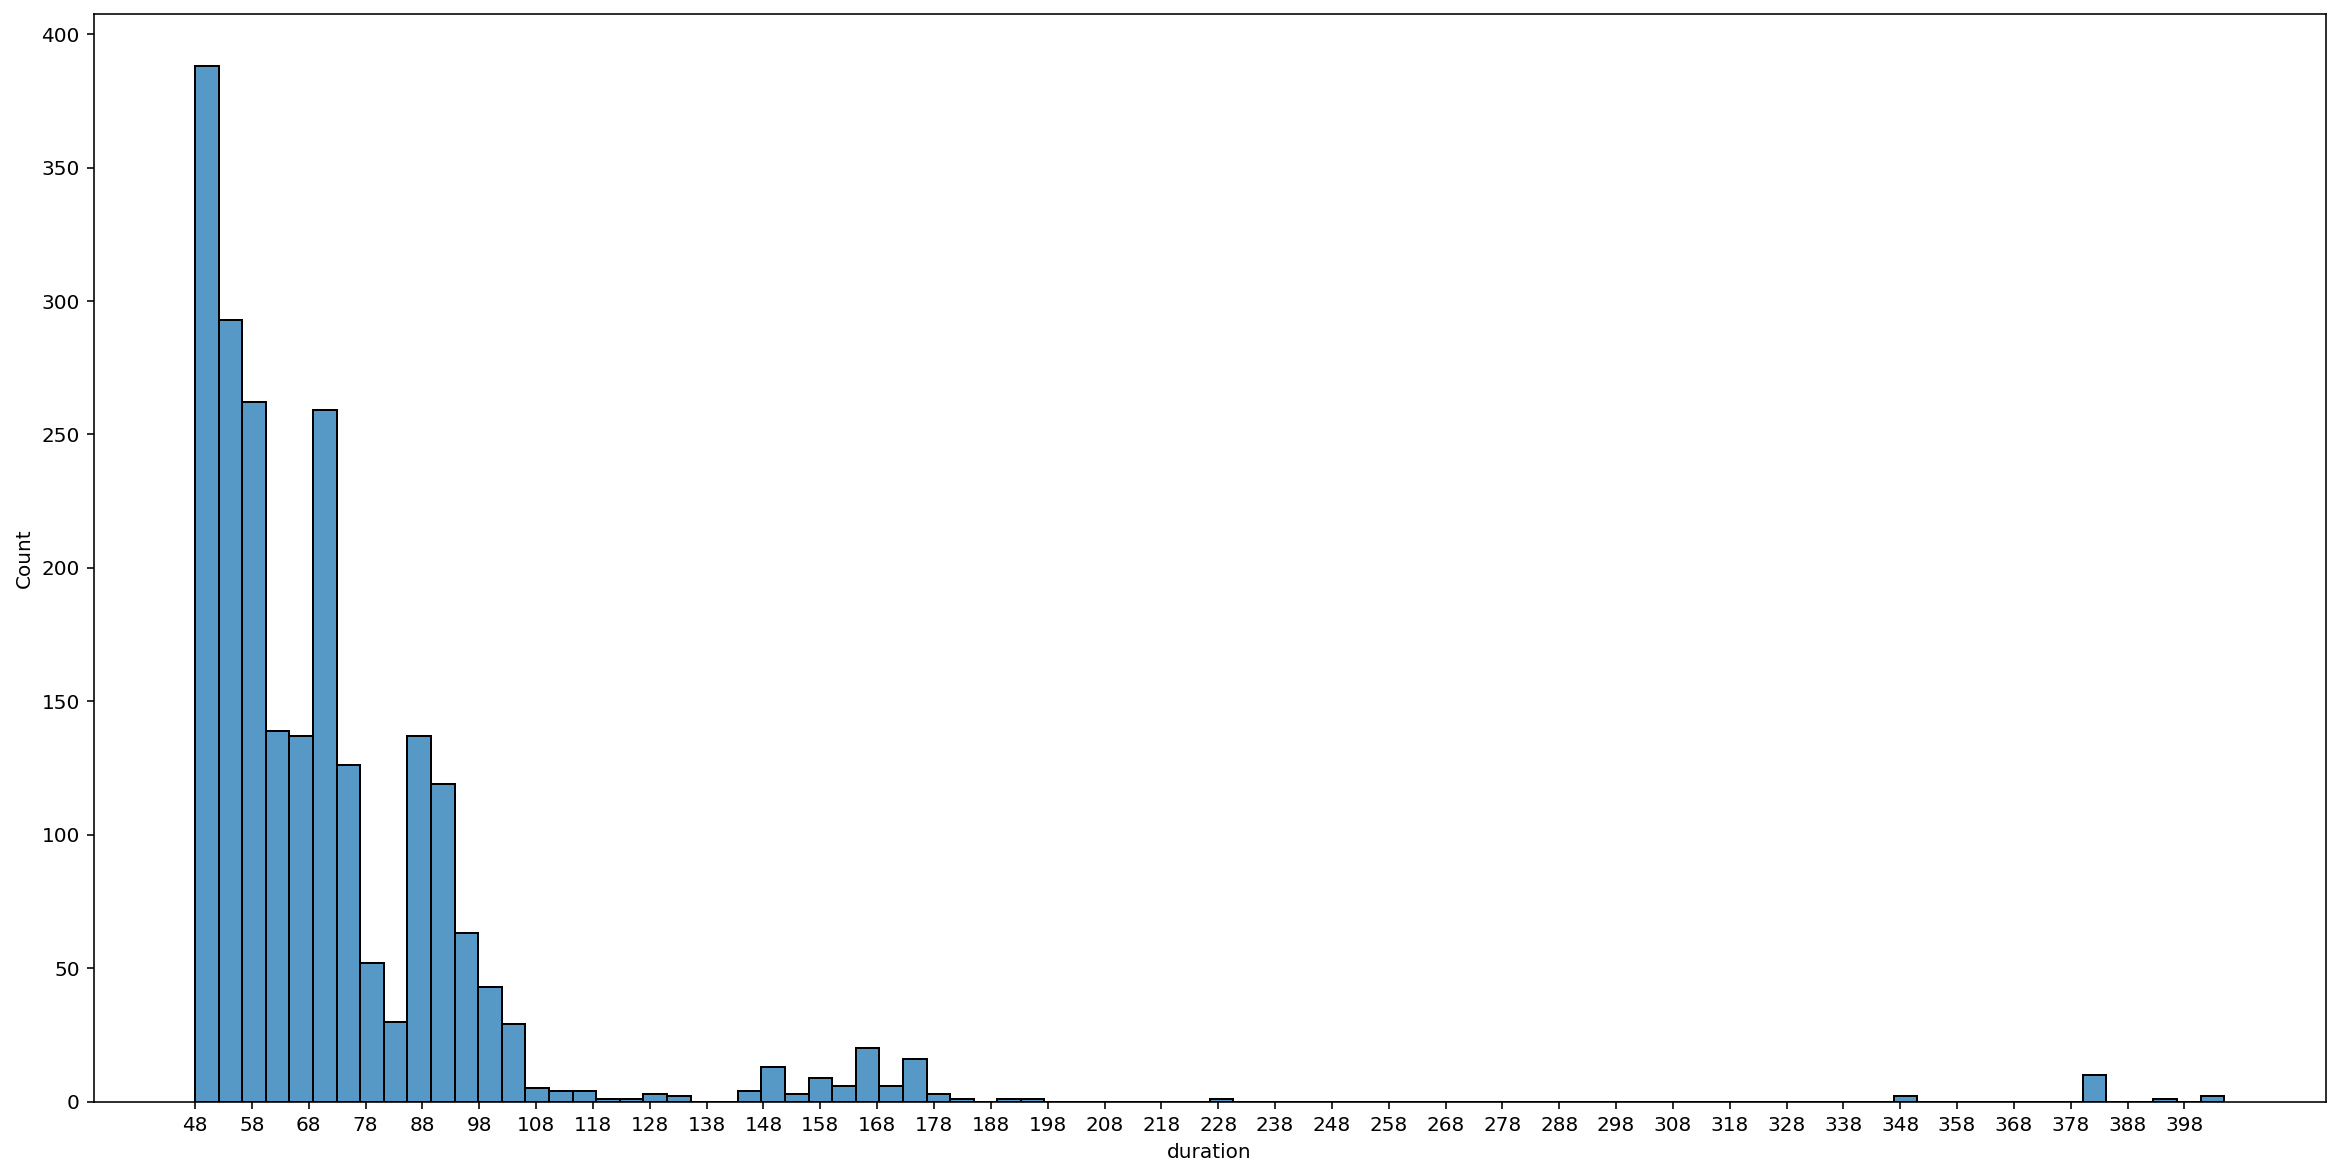

In [10]:
g = sns.histplot(
    data=df[df['duration'] >= 48], 
    x='duration',
    palette='mako'
)
g.set_xticks(range(48, 405, 10))

In [11]:
df['pitch'] = df['pitch'].replace(128, np.nan)
df['pitch'].value_counts().sort_values(ascending=False)

67.0     7139
65.0     5943
72.0     5106
70.0     4967
69.0     4942
         ... 
31.0        1
103.0       1
101.0       1
98.0        1
95.0        1
Name: pitch, Length: 70, dtype: int64

In [12]:
df['max_pitch'] = df.groupby('song_idx')['pitch'].transform(np.max)
df['min_pitch'] = df.groupby('song_idx')['pitch'].transform(np.min)

/home/manu/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

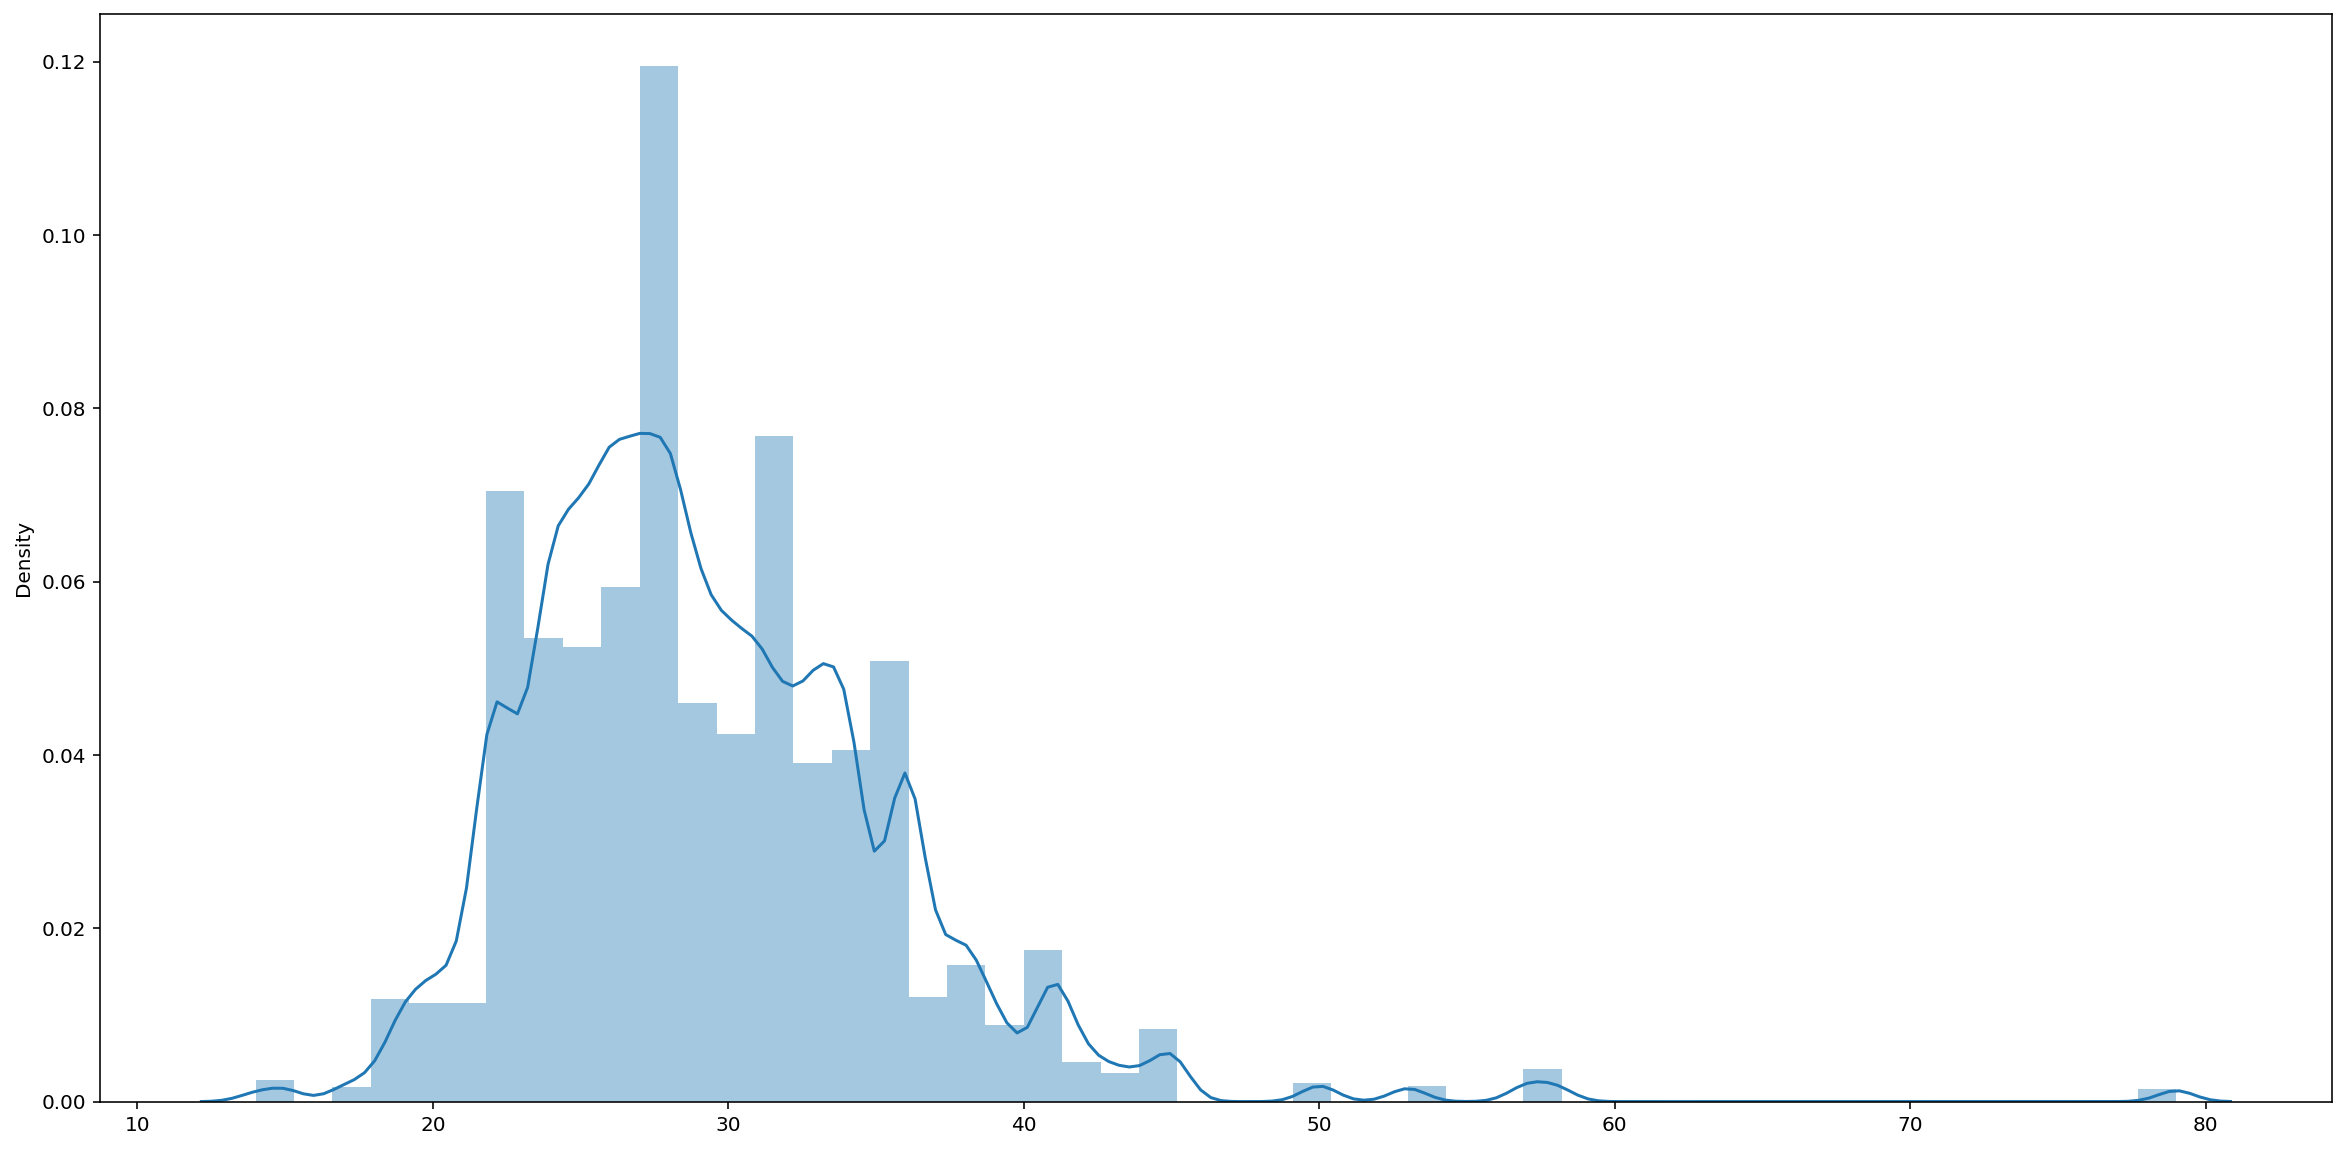

In [13]:
sns.distplot(df['max_pitch'] - df['min_pitch'])

In [14]:
df['pitch'].min(), df[df['pitch'] < 128]['pitch'].max() 

(27.0, 106.0)

In [15]:
df[df['pitch'] > df['pitch'].max() - 10]

,song_idx,original,ticks,offset,pitch,pitch_class,duration,chord,max_pitch,min_pitch
8742,21,0,693,21,98.0,D,1,"[53, 65, 68, 72, 75, 80, 84]",106.0,27.0
8743,21,0,694,22,101.0,F,1,"[53, 65, 68, 72, 75, 80, 84]",106.0,27.0
8744,21,0,695,23,103.0,G,1,"[53, 65, 68, 72, 75, 80, 84]",106.0,27.0
8745,21,0,696,24,106.0,Bb,2,"[46, 58, 62, 65, 68, 74, 77]",106.0,27.0


[Text(0, 0, 'C'),
 Text(1, 0, 'Db'),
 Text(2, 0, 'D'),
 Text(3, 0, 'Eb'),
 Text(4, 0, 'E'),
 Text(5, 0, 'F'),
 Text(6, 0, 'F#'),
 Text(7, 0, 'G'),
 Text(8, 0, 'Ab'),
 Text(9, 0, 'A'),
 Text(10, 0, 'Bb'),
 Text(11, 0, 'B'),
 Text(12, 0, 'C'),
 Text(13, 0, 'Db'),
 Text(14, 0, 'D'),
 Text(15, 0, 'Eb'),
 Text(16, 0, 'E'),
 Text(17, 0, 'F'),
 Text(18, 0, 'F#'),
 Text(19, 0, 'G'),
 Text(20, 0, 'Ab'),
 Text(21, 0, 'A'),
 Text(22, 0, 'Bb'),
 Text(23, 0, 'B'),
 Text(24, 0, 'C'),
 Text(25, 0, 'Db'),
 Text(26, 0, 'D'),
 Text(27, 0, 'Eb'),
 Text(28, 0, 'E'),
 Text(29, 0, 'F'),
 Text(30, 0, 'F#'),
 Text(31, 0, 'G'),
 Text(32, 0, 'Ab'),
 Text(33, 0, 'A'),
 Text(34, 0, 'Bb'),
 Text(35, 0, 'B'),
 Text(36, 0, 'C'),
 Text(37, 0, 'Db'),
 Text(38, 0, 'D'),
 Text(39, 0, 'Eb'),
 Text(40, 0, 'E'),
 Text(41, 0, 'F'),
 Text(42, 0, 'F#'),
 Text(43, 0, 'G'),
 Text(44, 0, 'Ab'),
 Text(45, 0, 'A'),
 Text(46, 0, 'Bb'),
 Text(47, 0, 'B'),
 Text(48, 0, 'C'),
 Text(49, 0, 'Db'),
 Text(50, 0, 'D'),
 Text(51, 0, 'Eb'),


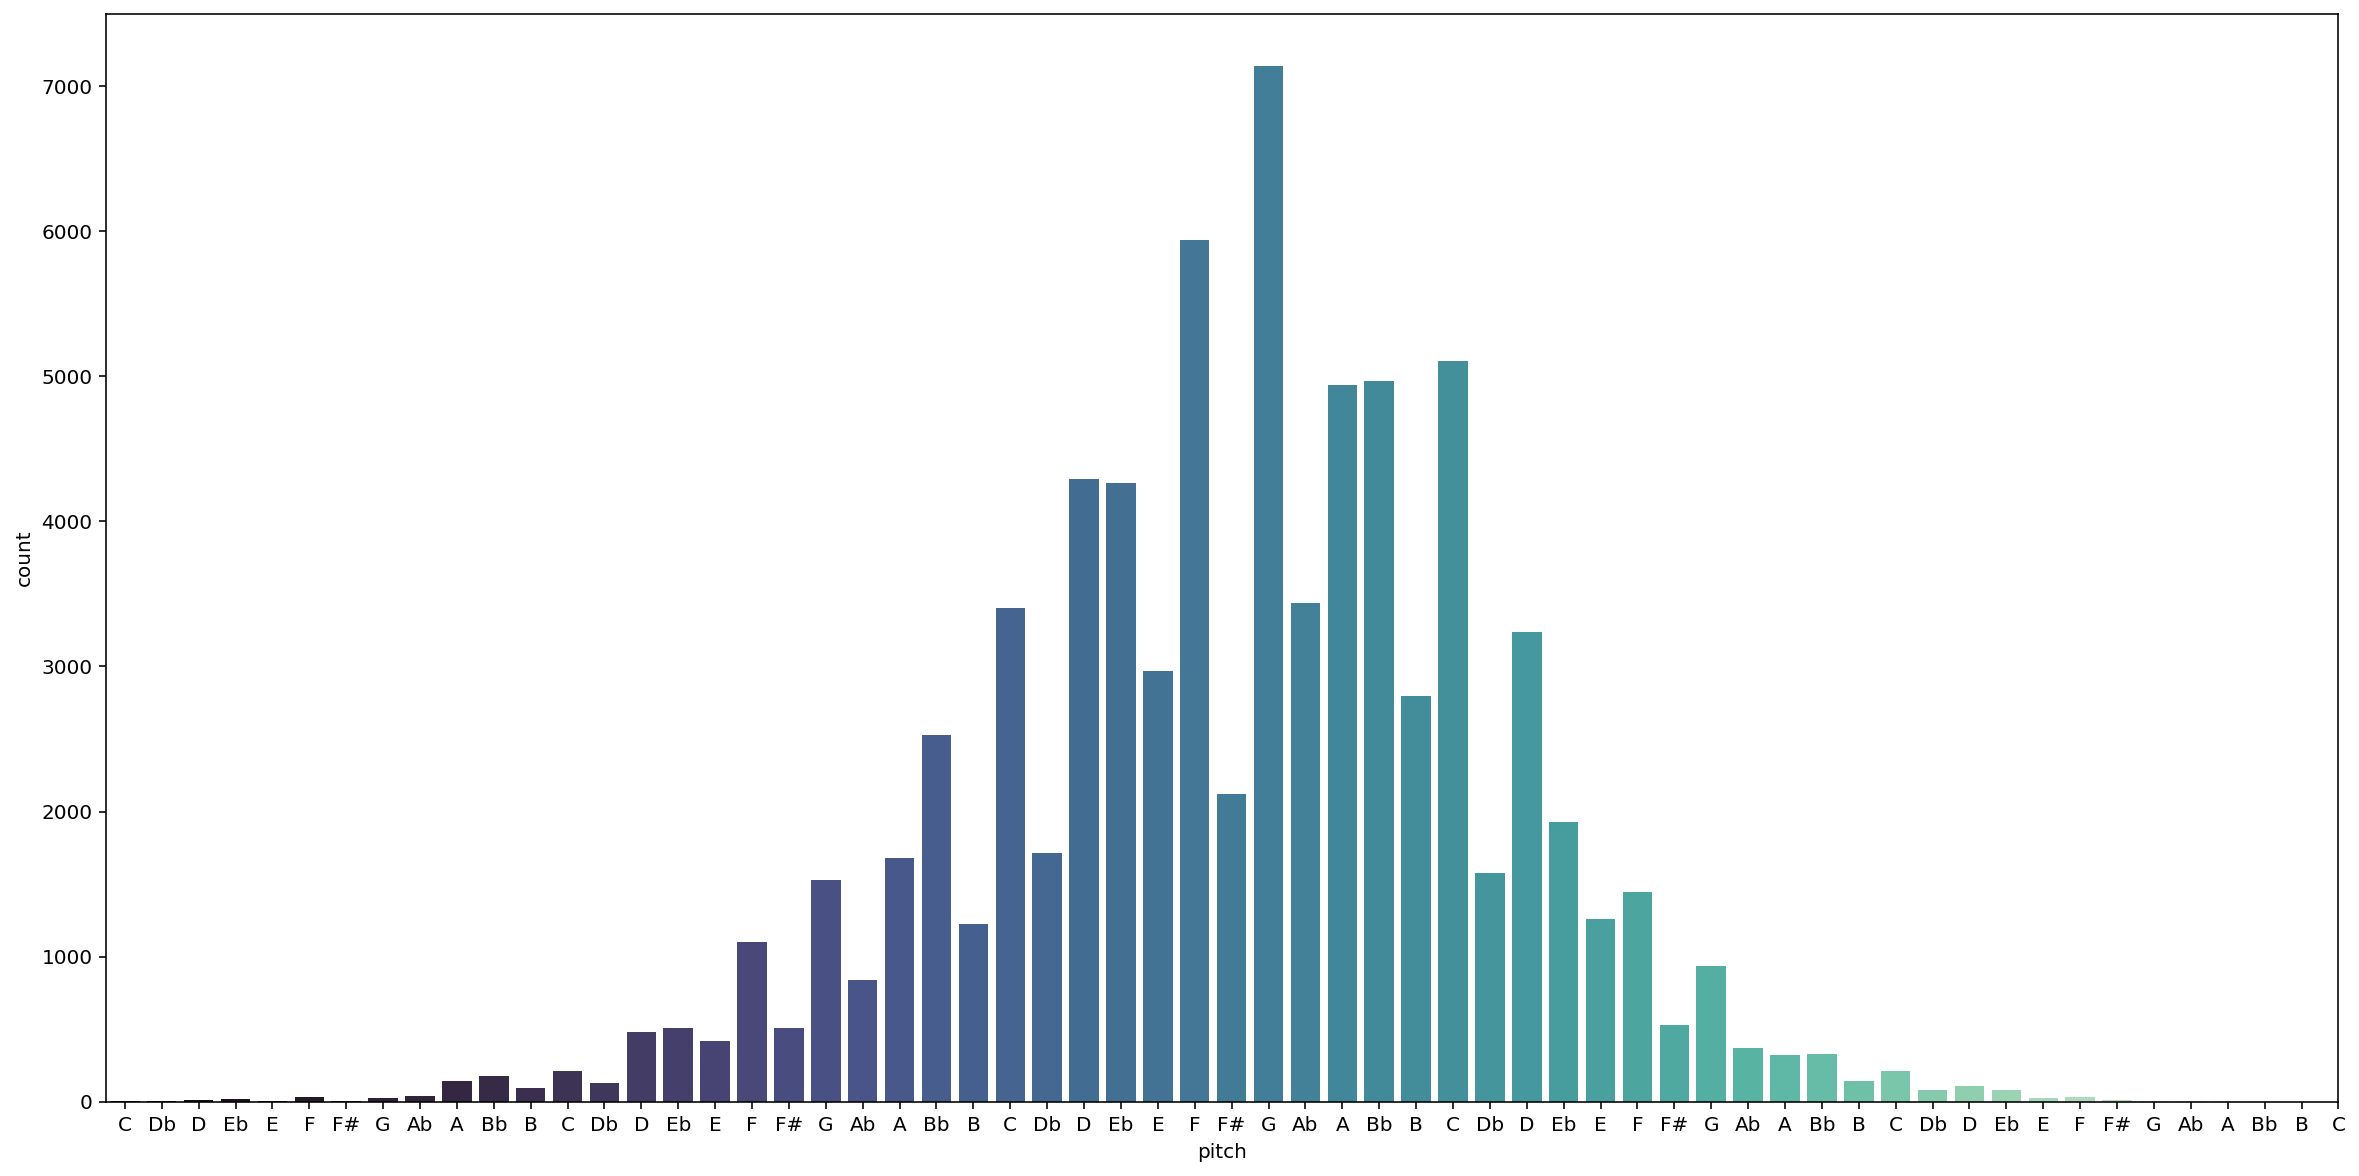

In [16]:
g = sns.countplot(data=df[(df['pitch'] >= 36) & (df['pitch'] < 97)], 
                 x='pitch', 
#                  hue='pitch_class',
                  palette='mako'
#                  stat="density", common_norm=False
                )
g.set_xticks(range(0,61))
g.set_xticklabels(pitch_classes * 5 + ['C'])

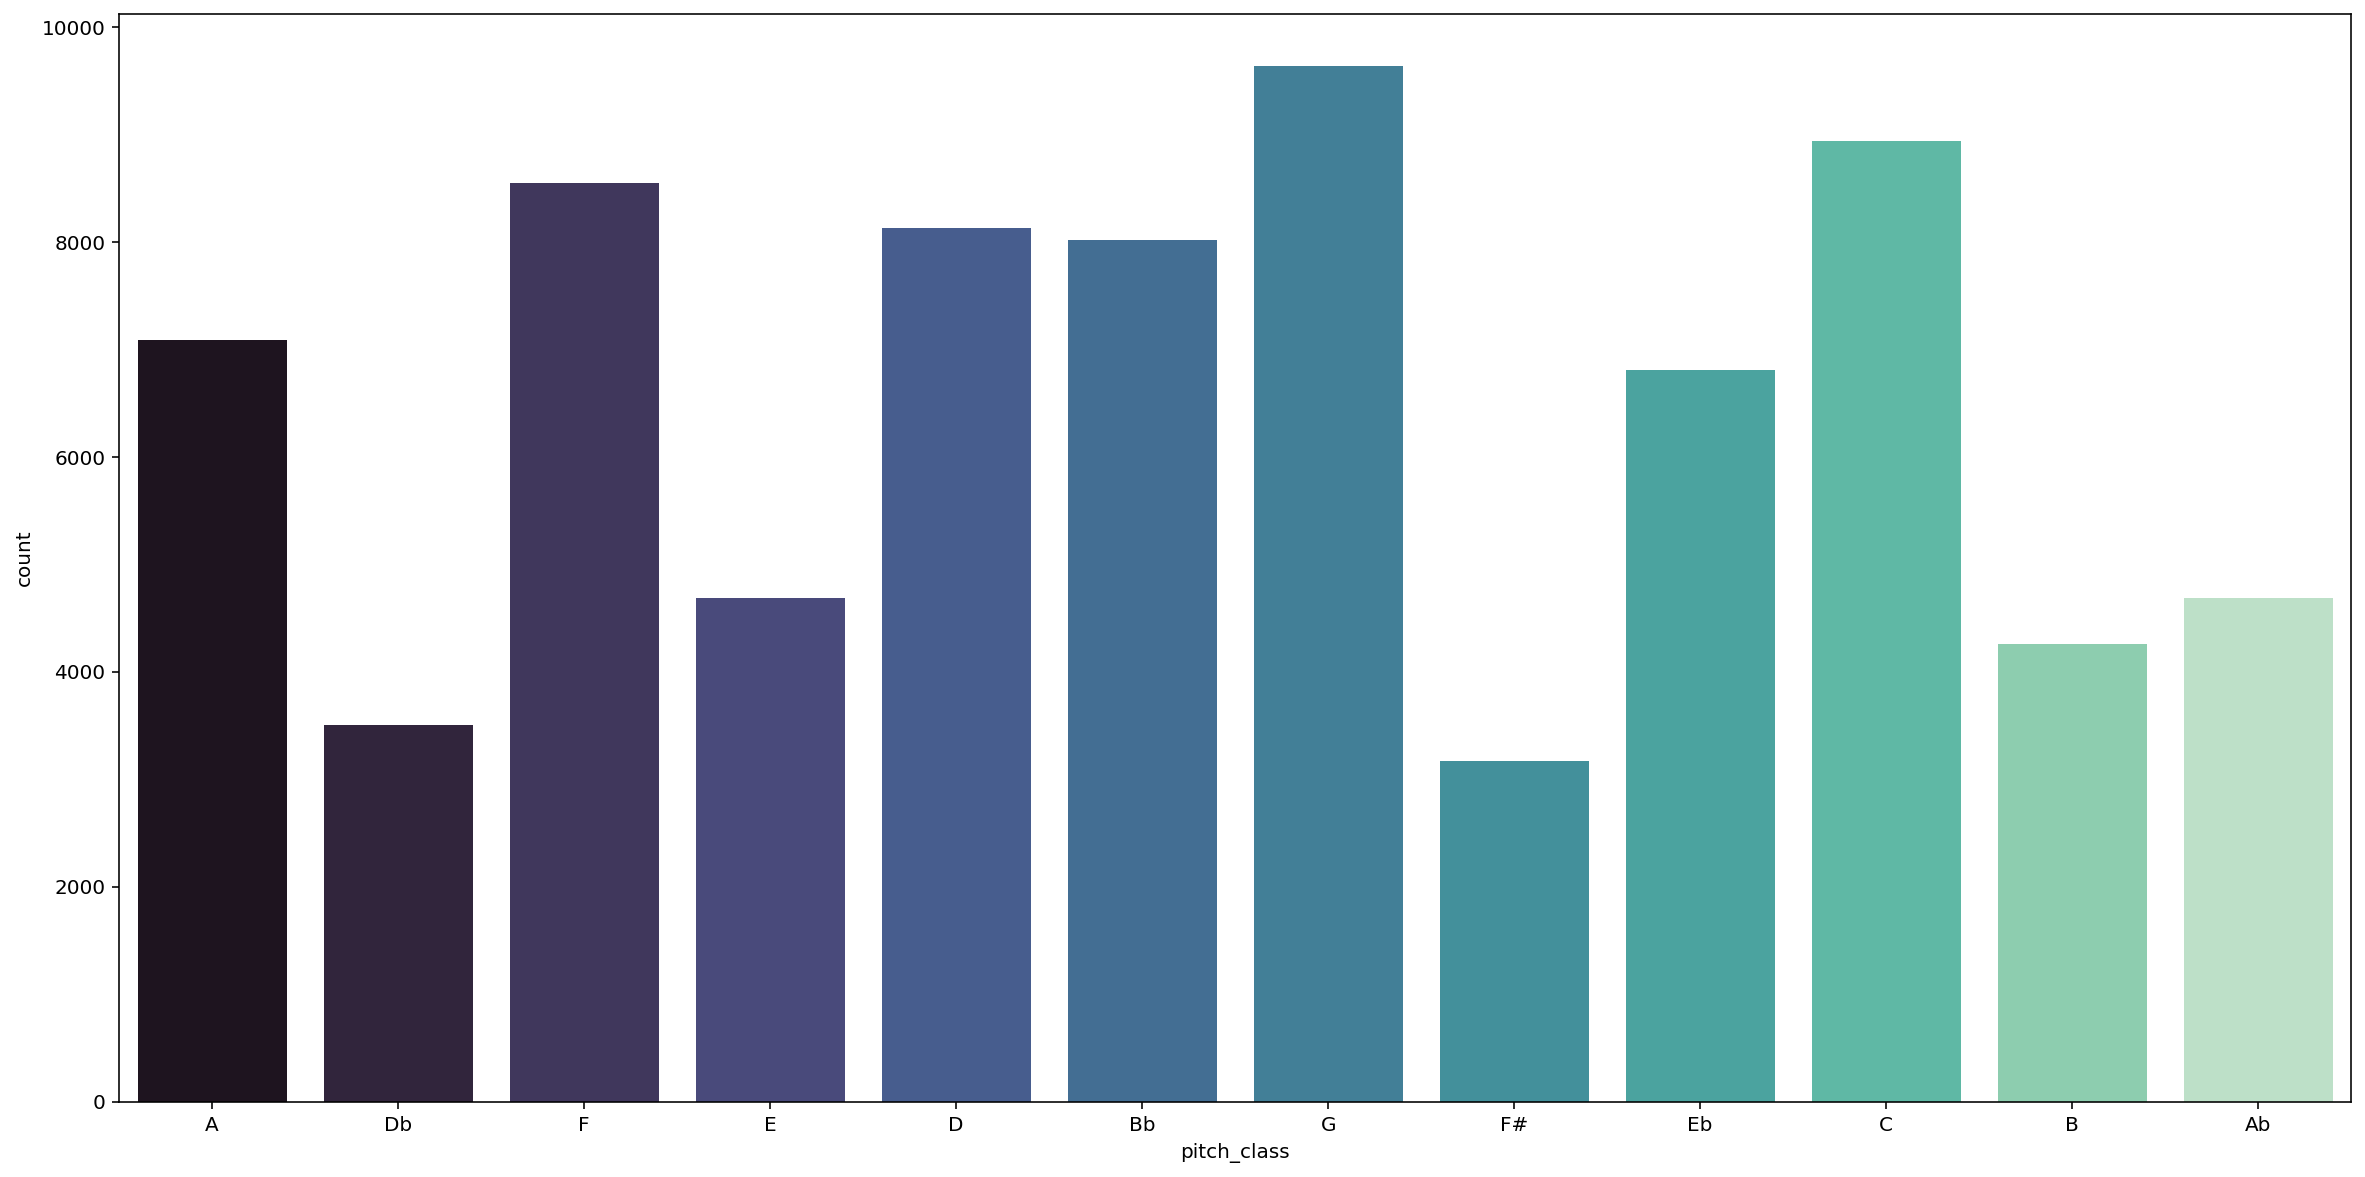

In [17]:
g = sns.countplot(data=df, 
  x='pitch_class', 
  palette='mako'
# hue='original', 
# stat="density", common_norm=False
 )

In [42]:
a = df[(df['pitch'] >= 48) & (df['pitch'] < 84)].shape[0]

In [46]:
b = df[(df['pitch'] < 48) | (df['pitch'] >= 84)].shape[0]

In [47]:
a / df.shape[0]

0.600609084327489

In [48]:
100 * (b / df.shape[0])

0.9159872832006043